In [17]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
ds = xr.open_dataset("MinT.nc")
ds

<xarray.Dataset>
Dimensions:     (valid_time: 2201, latitude: 29, longitude: 21)
Coordinates:
    number      int64 ...
  * valid_time  (valid_time) datetime64[ns] 2025-03-01 ... 2025-05-31T16:00:00
  * latitude    (latitude) float64 11.5 11.25 11.0 10.75 ... 5.25 5.0 4.75 4.5
  * longitude   (longitude) float64 -1.5 -1.25 -1.0 -0.75 ... 2.75 3.0 3.25 3.5
    expver      (valid_time) object ...
Data variables:
    mn2t        (valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-05T16:22 GRIB to CDM+CF via cfgrib-0.9.1...

In [12]:
monthly_avg = ds["mn2t"].groupby("valid_time.month").mean("valid_time")
print(monthly_avg)

<xarray.DataArray 'mn2t' (month: 3, latitude: 29, longitude: 21)>
array([[[305.56528, 305.85892, 305.94943, ..., 306.26364, 306.1443 ,
         305.68497],
        [305.65903, 305.95706, 306.08752, ..., 306.0529 , 305.93726,
         305.7351 ],
        [305.70377, 306.09824, 306.22922, ..., 305.742  , 305.7318 ,
         305.5294 ],
        ...,
        [300.46927, 300.7832 , 300.90814, ..., 301.69748, 301.68576,
         301.68738],
        [300.86057, 300.95264, 301.07675, ..., 301.6786 , 301.6554 ,
         301.65698],
        [301.08698, 301.17755, 301.2242 , ..., 301.65878, 301.63626,
         301.62704]],

       [[305.7176 , 306.00223, 306.2975 , ..., 307.2278 , 307.3652 ,
         307.1212 ],
        [305.73123, 306.01874, 306.16357, ..., 306.7897 , 306.92746,
         307.05283],
        [305.67136, 306.0745 , 306.21976, ..., 306.32043, 306.43173,
         306.5571 ],
...
        [300.6214 , 300.94623, 301.04996, ..., 301.571  , 301.55316,
         301.53647],
        [301.06

In [15]:
first = monthly_avg[0]

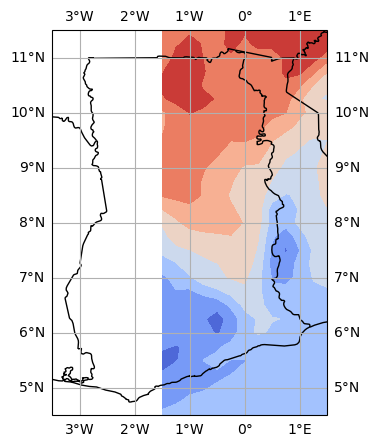

In [22]:
plt.figure(figsize=(8, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-3.5, 1.5, 4.5, 11.5])
ax.add_feature(cfeature.BORDERS)
ax.gridlines(draw_labels=True)
plt.contourf(first.longitude, first.latitude, first.values, 
             transform=ccrs.PlateCarree(), cmap="coolwarm")
plt.show()

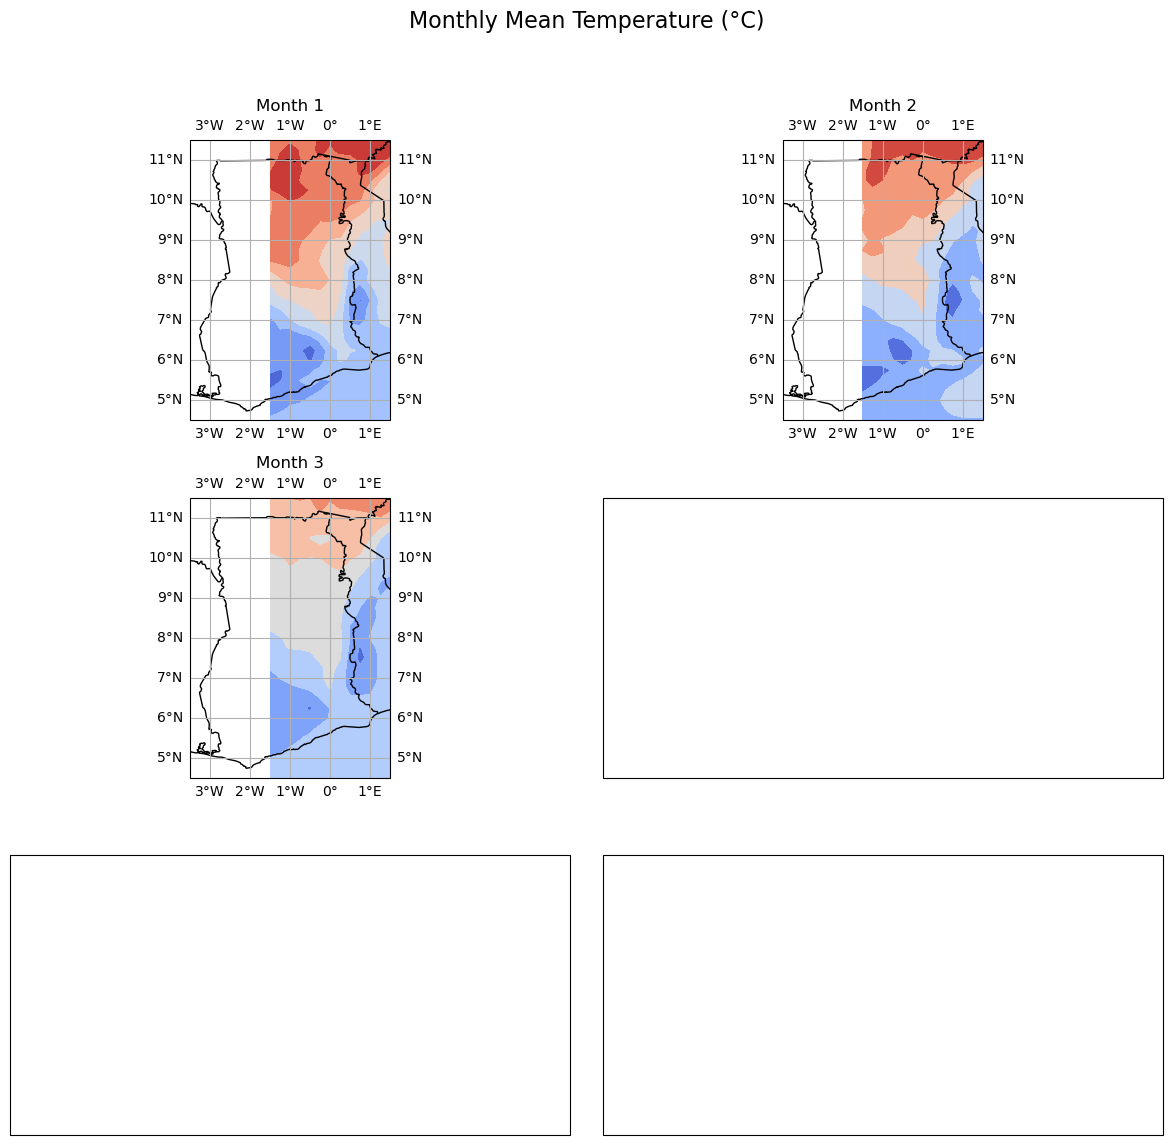

In [40]:
# Create a 3x2 grid for 6 months
fig, axs = plt.subplots(3, 2, figsize=(12, 12), subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle("Monthly Mean Temperature (°C)", fontsize=16)

# Loop through the months dynamically
for i in range(len(monthly_avg)):  # Only loop through available months
    row = i // 2
    col = i % 2
    ax = axs[row][col]

    # Get the data for the month
    month_data = monthly_avg[i]

    # Plot
    contour = ax.contourf(
        month_data.longitude,
        month_data.latitude,
        month_data.values,
        transform=ccrs.PlateCarree(),
        cmap="coolwarm"
    )

    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.set_extent([-3.5, 1.5, 4.5, 11.5])
    ax.gridlines(draw_labels=True)
    ax.set_title(f"Month {i+1}")


plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for suptitle
plt.show()